In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import h5py
import seaborn
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import pairwise_distances
import sys
sys.path.append("../")
from utils import l2_normalize, prewhiten, read_sampled_identities, plot_recall, recall_given_dist, plot_topk
from PIL import Image
seaborn.set()

In [8]:
attack_name = "community_naive_mean"

kwargs = {
    "attack_name": attack_name,
    "path_to_adversarial": "/data/vggface/test_perturbed_sampled/{true}/" + attack_name + "/{target}/epsilon_{epsilon}.h5",
    "path_to_clean": "/data/vggface/test_preprocessed_sampled/{id}/embeddings.h5",
    "epsilons": [0.0, 0.02, 0.04, 0.06, 0.08, 0.1],
    "identities": read_sampled_identities("../sampled_identities.txt").keys()
}

kwargs_topk = kwargs.copy()
del kwargs_topk["attack_name"]
del kwargs_topk["epsilons"]

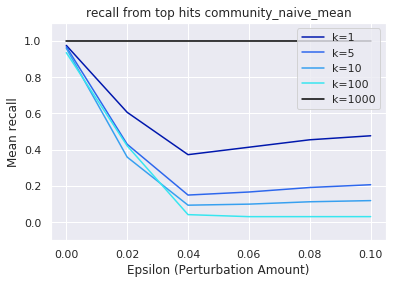

In [3]:
plot_recall(
    ks=[1, 5, 10, 100, 1000],
    colors=['#0017ad', '#2d67ed', '#37a0f0', '#37e6f0','#000000'],
    mode="recall",
    **kwargs
)

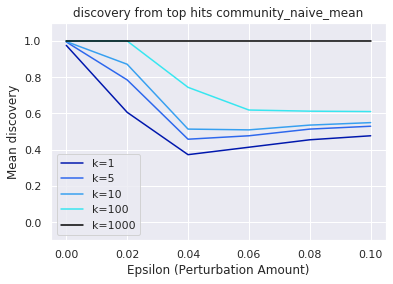

In [4]:
plot_recall(
    ks=[1, 5, 10, 100, 1000],
    colors=['#0017ad', '#2d67ed', '#37a0f0', '#37e6f0','#000000'],
    mode="discovery",
    **kwargs
)

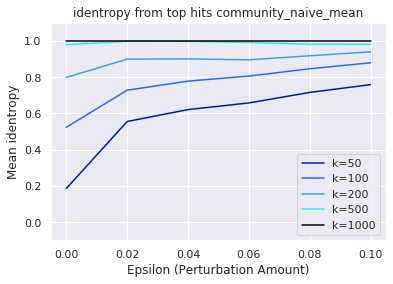

In [9]:
plot_recall(
    ks=[50, 100, 200, 500, 1000],
    colors=['#0017ad', '#2d67ed', '#37a0f0', '#37e6f0','#000000'],
    mode="identropy",
    **kwargs
)

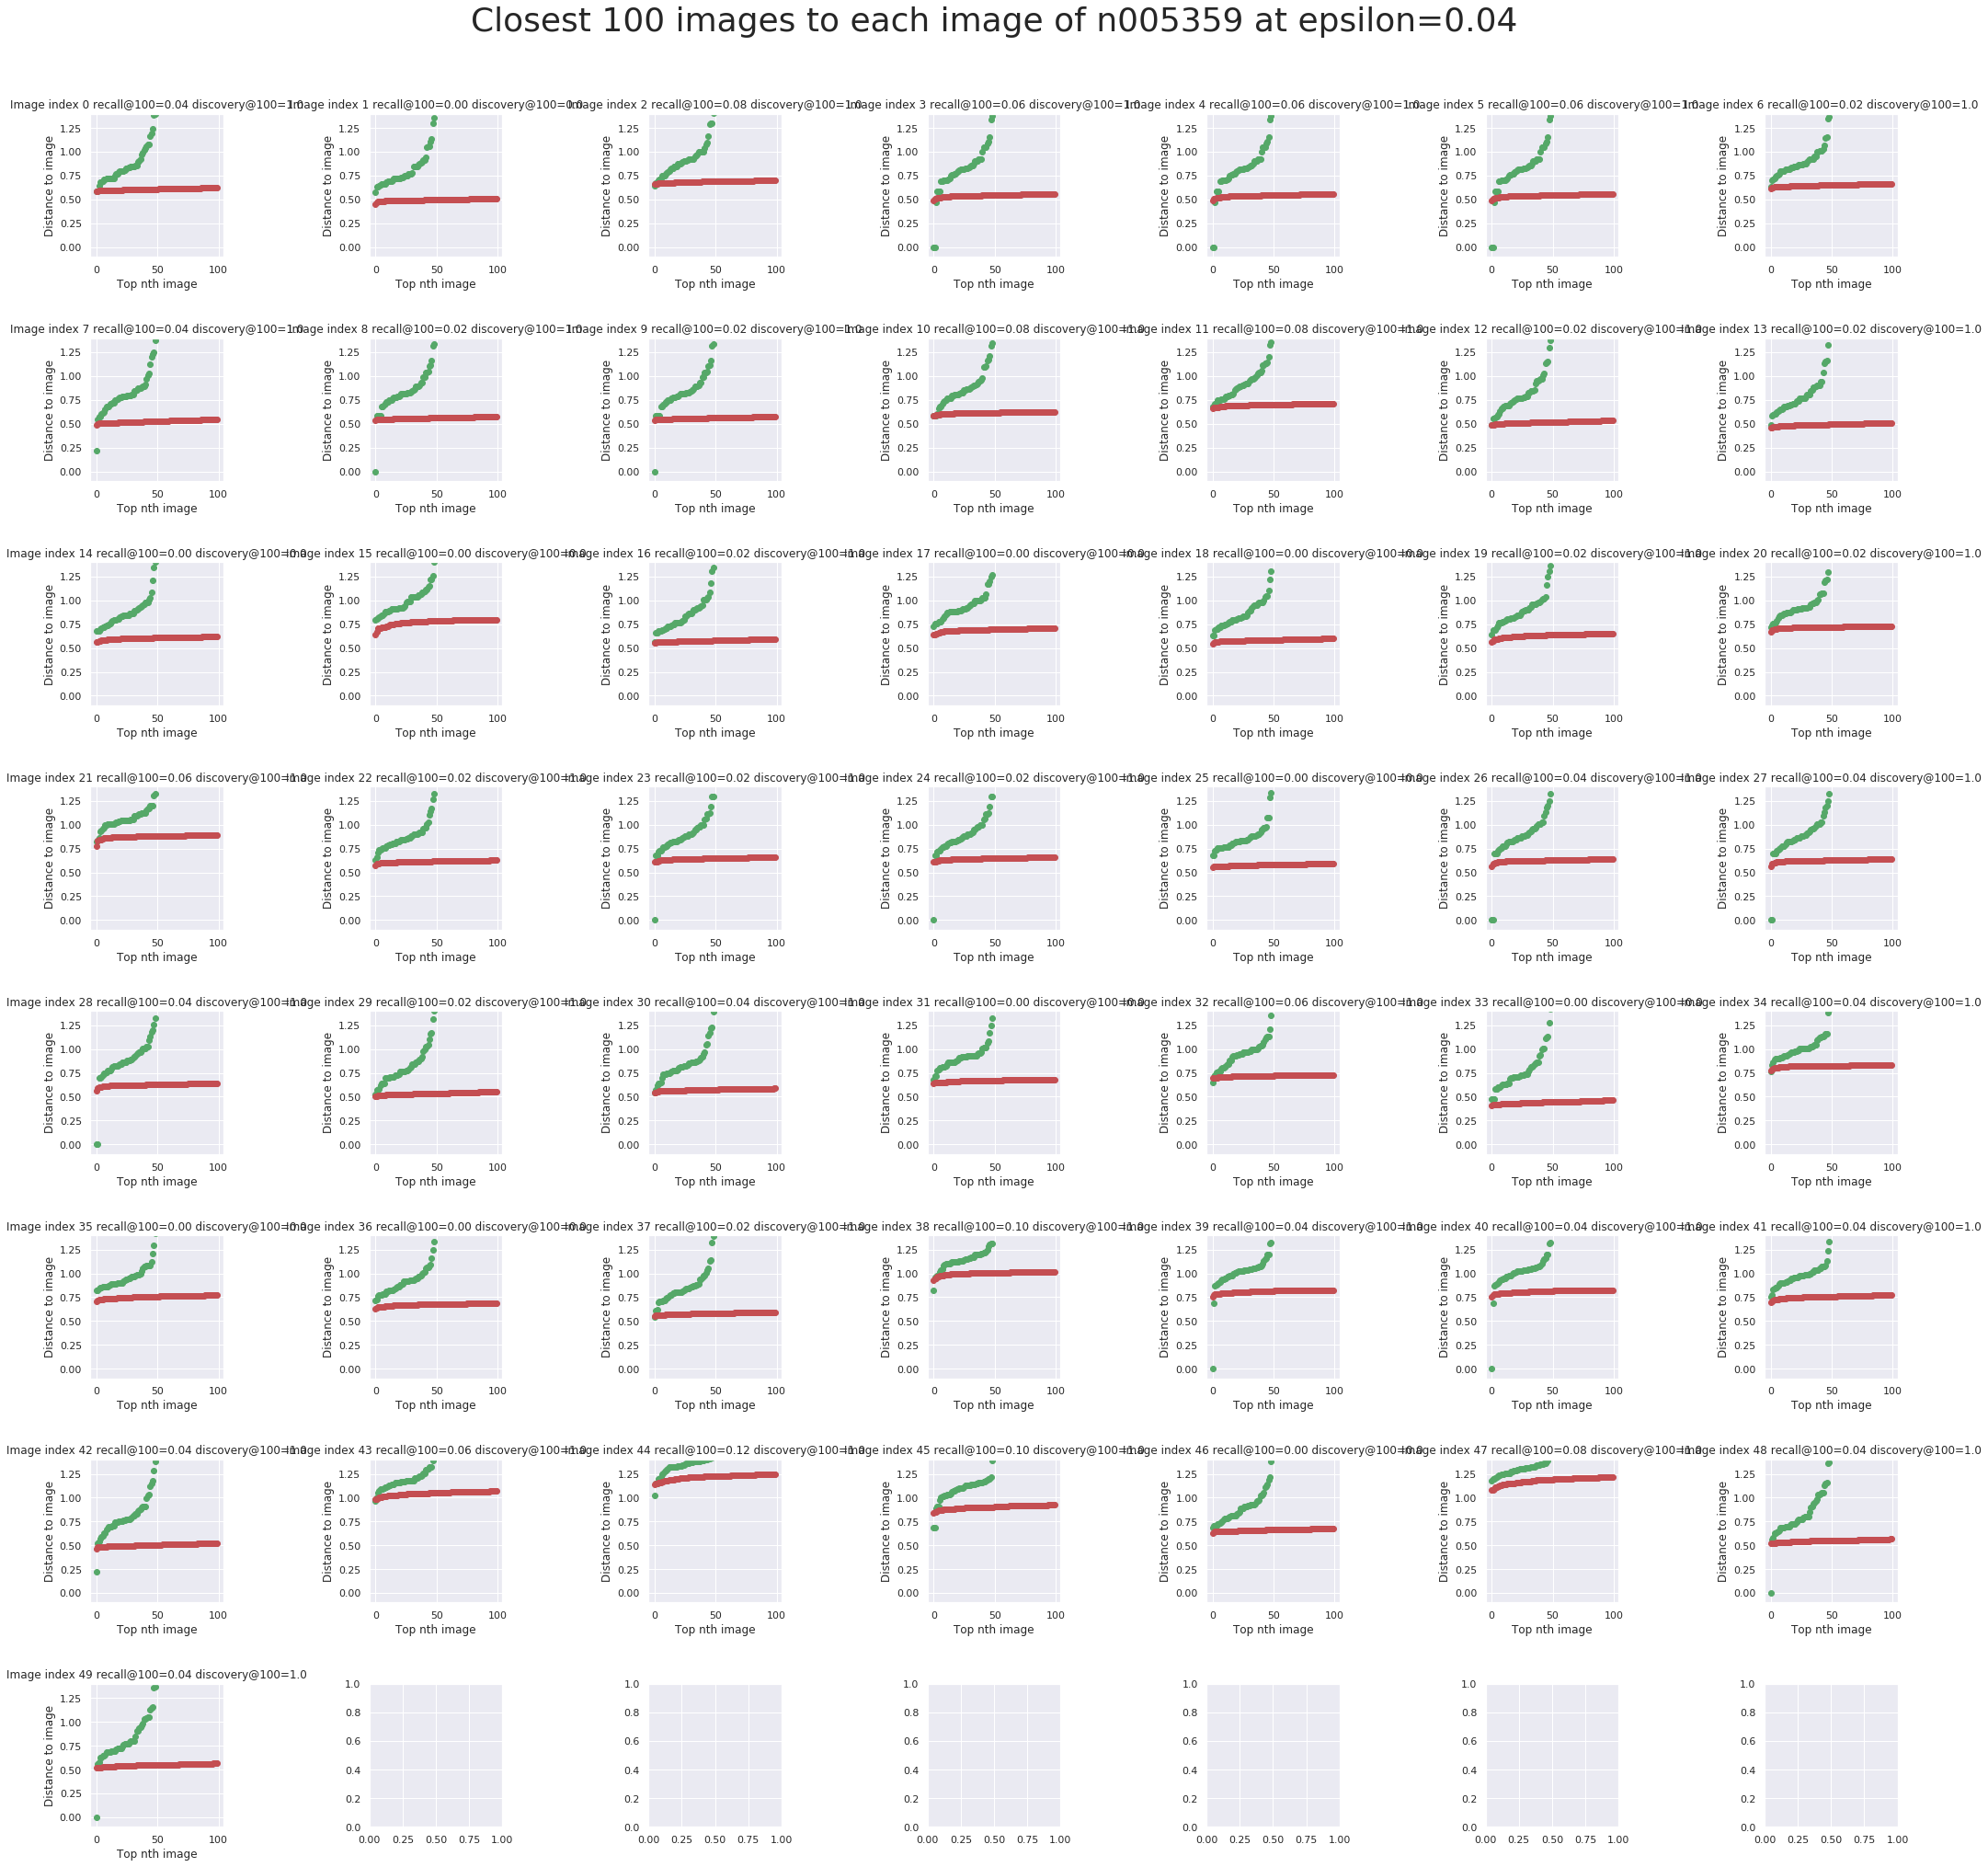

In [6]:
plot_topk(
    adversarial_target="n005359", 
    epsilon=0.04,
    mode="discovery",
    k=100,
    **kwargs_topk
)